## LINK FOR THE DOC 
https://docs.google.com/document/d/1JrC8l3wnJh1Hbkr1Za1RiyjeomKR0s33TNJusvO3etk/edit?usp=sharing

In [1]:
from matplotlib import pyplot as plt
from math import floor

plt.style.use('seaborn-whitegrid')
plt.rcParams.update({'figure.max_open_warning': 0})

In [2]:
# Python 3 implementation to design
# a queue data structure to get
# minimum element in O(1) time
from collections import deque as dq
 
# class for the queue
 
 
class MinQueue:
 
    def __init__(self):
        # Queue to store the
        # element to maintain the
        # order of insertion
        self.Q = dq([])
 
        # Doubly ended queue to
        # get the minimum element
        # in the O(1) time
        self.D = dq([])
 
    # Function to push a element
    # into the queue
    def enque_element(self, element):
        # If there is no element
        # in the queue
        if (len(self.Q) == 0):
            self.Q.append(element)
            self.D.append(element)
 
        else:
            self.Q.append(element)
 
            # Pop the elements out
            # until the element at
            # back is greater than
            # current element
            while (self.D and
                   self.D[-1] > element):
                self.D.pop()
 
            self.D.append(element)
 
    # Function to pop the element
    # out from the queue
 
    def deque_element(self,):
        # Condition when the Minimum
        # element is the element at
        # the front of the Deque
        if (self.Q[0] == self.D[0]):
            self.Q.popleft()
            self.D.popleft()
 
        else:
            self.Q.popleft()
 
    # Function to get the
    # minimum element from
    # the queue
 
    def getMin(self,):
        return self.D[0]
 

In [3]:
# will return bandwidth in Bytes/sec.
def convBandwidth(input):
    if input[-4:] == "Mbps" : return ((10**6) * float(input[:-4]))/8
    elif input[-4:] == "MBps" : return (10**6) * float(input[:-4])
    elif input[-3:] == "Bps" : return float(input[:-3])
    elif input[-3:] == "bps"    : return float(input[:-3])/8
    else:
        print("conversion not supported")
        return -1

# will return time in sec.
def convTime(input):
    if input[-2:] == "ms" : return (10**(-3) * float(input[:-2]))
    elif input[-1:] == "s" : return float(input[:-1])
    elif input[-3:] == "sec" : return float(input[:-3])
    else:
        print("conversion not supported")
        return -1

# values_dict is a time series data dictionary
def plotvstime(values_dict, xlabel, ylabel, title):
    f = plt.figure()
    f.set_figwidth(25)
    f.set_figheight(6)
    
    plt.plot(values_dict.keys(), values_dict.values())
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
def plotvstime_n(values_dict_n, xlabel, ylabel, title, n_flows):
    f = plt.figure()
    f.set_figwidth(25)
    f.set_figheight(6)
    for i in range(n_flows):
        plt.plot(values_dict_n[i].keys(), values_dict_n[i].values())
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
def plotvstime_n_avg(values_dict_n, xlabel, ylabel, title, n_flows):
    f = plt.figure()
    f.set_figwidth(25)
    f.set_figheight(6)
    
    avg_values = {}
    for t in values_dict_n[0].keys():
        
        temp_sum = 0
        for i in range(n_flows):
            temp_sum = temp_sum + values_dict_n[i][t]
            
        avg_values[t] = temp_sum/n_flows
        #print(avg_values)
   
    plt.plot(avg_values.keys(), avg_values.values())
        
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.title(title)
    
def plotvstime_avg_each_flow(values_dict_n, xlabel, ylabel, title, n_flows):
    f = plt.figure()
    f.set_figwidth(25)
    f.set_figheight(6)
    
    value_each_flow = {}
    
    for i in range(n_flows):
        value_each_flow[i+1]= sum(values_dict_n[i].values())/len(values_dict_n[i].keys())
    
    plt.bar(value_each_flow.keys(), value_each_flow.values())
        
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.title(title)

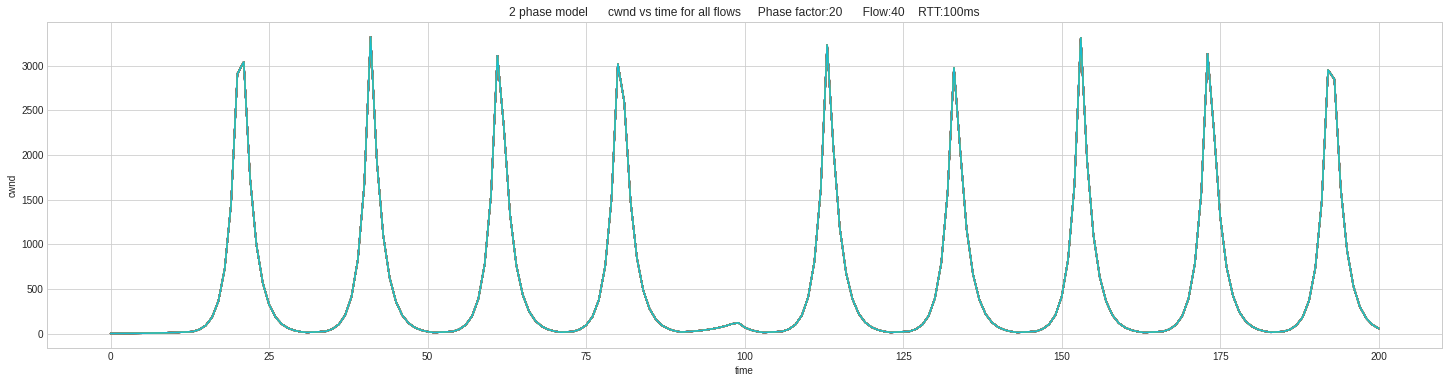

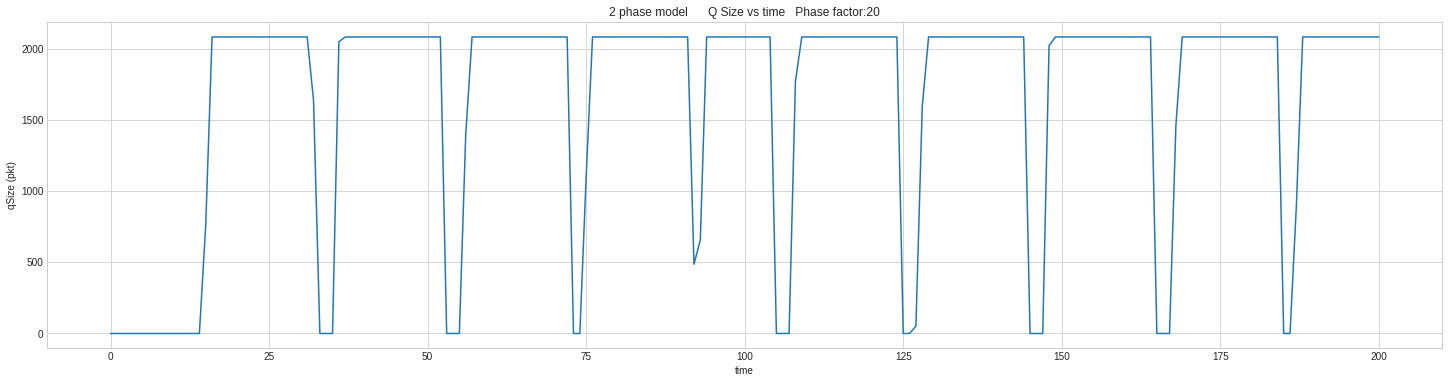

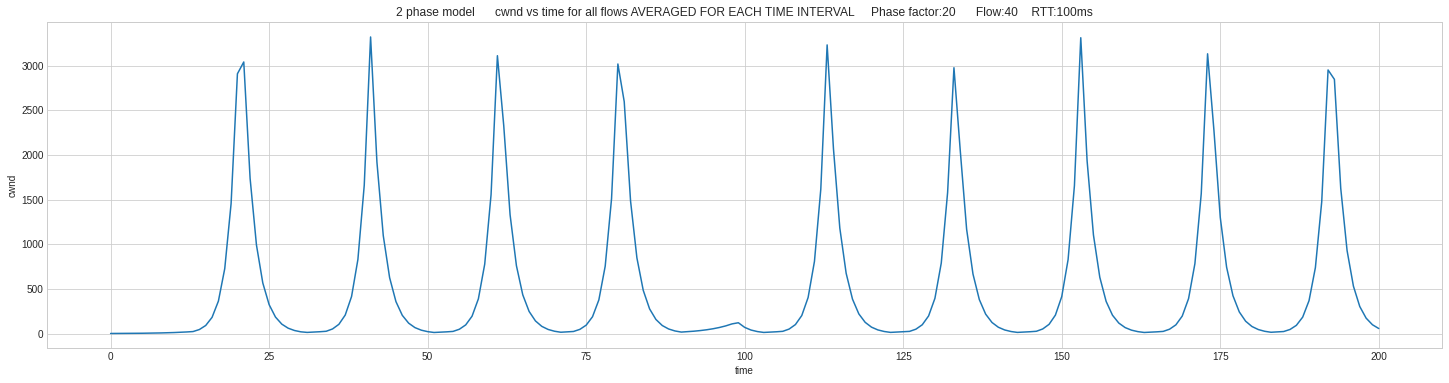

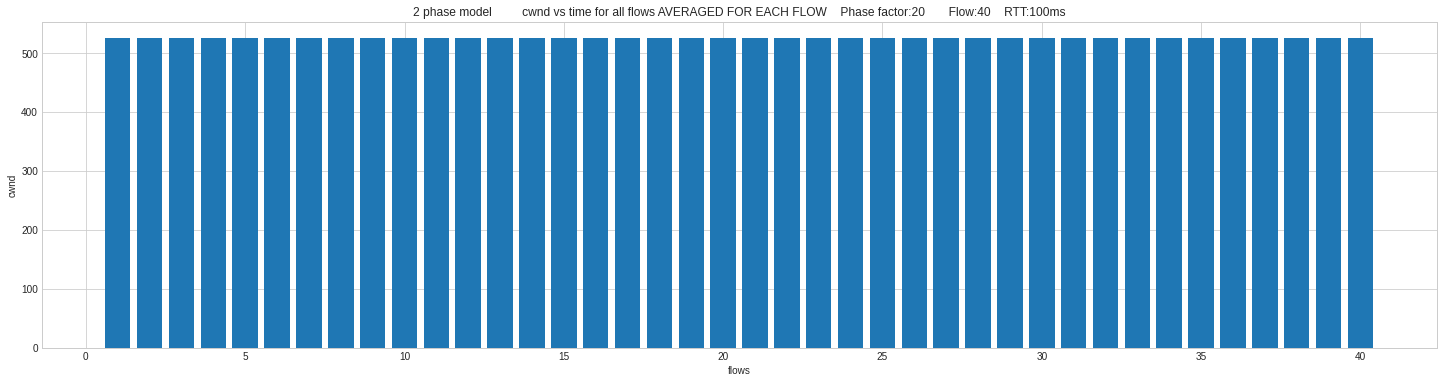

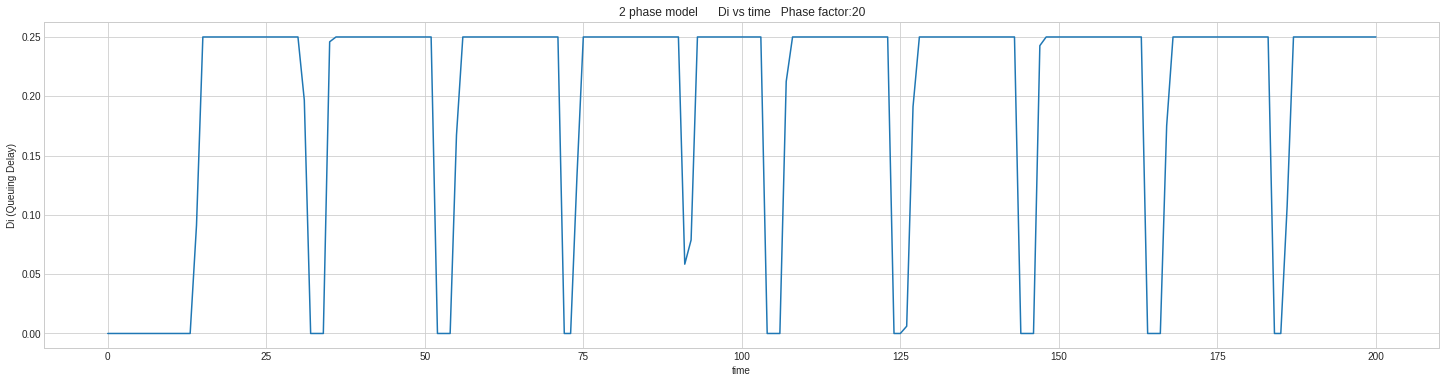

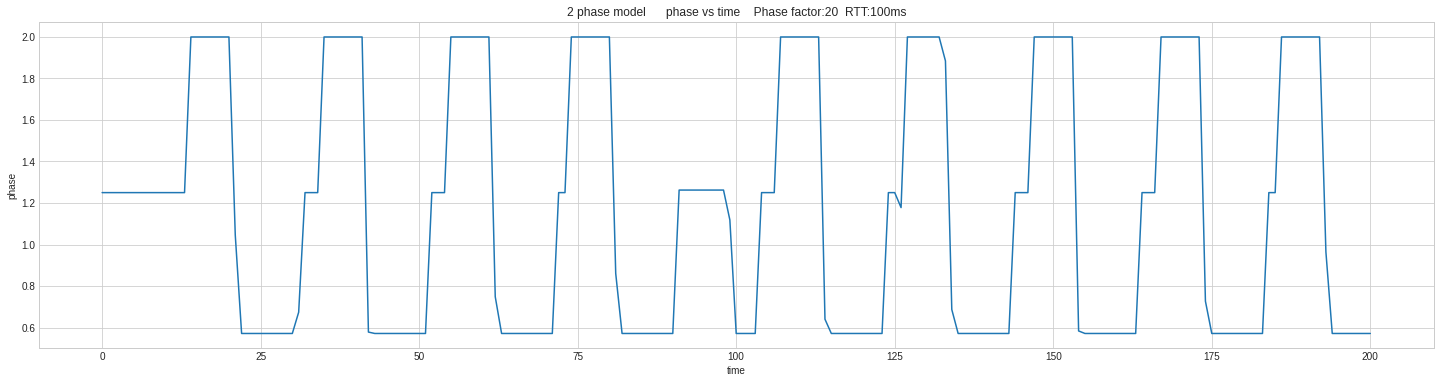

In [8]:
# CONFIG
deltaTime_str = "1sec"
bottleneck_delay_str = "1ms"
pktsize = 1500
n_flows = 40
phase_factor = 20
RTT_str = "100ms"
queueL = "2084p"
btlnkBandwidth_str = "100Mbps"
initialQSizePerc = 0
starttime = 0
endtime = 200


deltaTime = convTime(deltaTime_str)
RTT = convTime(RTT_str)

class queueObj:
    maxSizePkts = 0
    currSizePkts = 0
    probe_counter = 0
    rec_delays = []
    # will get updated after constructor call
    btlnkBandwidth = 1 
    queueingDelay = currSizePkts/btlnkBandwidth
    minQueueingDelay = queueingDelay
    minDelayQueue = MinQueue()
    
    
    def __init__(self, maxSizePkts, btlnkBandwidth, initialPkt):
        self.maxSizePkts = maxSizePkts
        self.btlnkBandwidth = btlnkBandwidth
        self.currSizePkts = initialPkt
        self.queueingDelay = (self.currSizePkts*pktsize)/self.btlnkBandwidth
        self.probe_counter = 0
        
            
    def updateSizeWithIncoming(self, nCwndSizePkts):
        self.currSizePkts = self.currSizePkts + floor((deltaTime*((sum(nCwndSizePkts)*pktsize)/RTT - self.btlnkBandwidth))/pktsize)
        
        if self.currSizePkts < 0 : self.currSizePkts = 0
        elif self.currSizePkts >= self.maxSizePkts: self.currSizePkts = self.maxSizePkts
        
        X = 8
        # Using a deque data structure to find the min of last X iterations in O(1)
        self.queueingDelay = (self.currSizePkts*pktsize)/self.btlnkBandwidth
        
        if self.probe_counter < X:
            self.minDelayQueue.enque_element(self.queueingDelay)
        else:
            self.minDelayQueue.deque_element()
            self.minDelayQueue.enque_element(self.queueingDelay)
            
        self.minQueueingDelay = self.minDelayQueue.getMin()
        self.probe_counter += 1
               
        
        # self.minQueueingDelay = min(self.minQueueingDelay, self.queueingDelay)
        #self.minQueueingDelay = self.queueingDelay
        
    # def updateSizeWithOutgoing(self):
    #     self.currSizePkts = self.currSizePkts - floor(self.btlnkBandwidth/pktsize)
        
    #     if self.currSizePkts < 0 : self.currSizePkts = 0
    #     elif self.currSizePkts >= self.maxSizePkts: self.currSizePkts = self.maxSizePkts
        
    #     self.queueingDelay = (self.currSizePkts*pktsize)/self.btlnkBandwidth
        
    #     self.minQueueingDelay = min(self.minQueueingDelay, self.queueingDelay)
        
   
def isPacingControlled(qObj, phase_factor):
    # if the queue is 1/3rd( subject to change) filled, then bandwidth is underestimated i.e. pacing controlled
    if ( qObj.currSizePkts < qObj.maxSizePkts/phase_factor ): return 1
     # otherwise congestion window controlled
    else: return 0

def Simul():      
    
    queueSizePkts = int(queueL[:-1])
    queueSizeBytes = pktsize*queueSizePkts
        
    btlnkBandwidth = convBandwidth(btlnkBandwidth_str)
    bottleneckDelay = convTime(bottleneck_delay_str)
    # # klienrock's optimal point
    # nCwndSize = [floor((btlnkBandwidth*RTT)/pktsize)]*n_flows
    
    nCwndSize = [1]*n_flows
    
    limitCwnd = 2*btlnkBandwidth*RTT
    
    initialQSize = floor(queueSizePkts * initialQSizePerc/100)
    
    # Creating a queue for the bottleneck link
    qobj = queueObj(queueSizePkts, btlnkBandwidth, initialQSize)
    
    nCwndSizeStore = {}
    qSizeStore = {}
    DiStore = {}
    phaseStore = {}
    currtime = starttime
    
    # simulation starts here
    while currtime <= endtime:
        #print(qobj.currSizePkts)
        
        # storing the qsize for plotting
        qSizeStore[currtime] = qobj.currSizePkts
        
        # Ti : RTT min for a flow i 
        # D : Queueing delay
        Ti  = RTT
        
        '''NOTE - Here when calling qobj.updateSizeWithIncoming, the queue gets filled by the cwnd of all the flows simultaneously. 
                  None of them gets the chance to use the entire queue for themselves.
        '''
        
        qobj.updateSizeWithIncoming(nCwndSize)
        D = qobj.queueingDelay
        Dmin = qobj.minQueueingDelay    
        DiStore[currtime] = qobj.queueingDelay
        
        if ( isPacingControlled(qobj, phase_factor) ):
            MIMD = (1.25 * Ti)/(Ti + D)
            phaseStore[currtime] = MIMD
        else:
            MIMD = (2 * Ti)/(Ti + Dmin)
            phaseStore[currtime] = MIMD
        
        for i in range(0,n_flows):
                 
            #limiting the congestion window to twice the size of BDP            
            nCwndSize[i] = min(nCwndSize[i] * MIMD, limitCwnd)
            # nCwndSize[i] = nCwndSize[i] * MIMD
                 
            # storing the number of packets( 1 pkt = 1500 By ) in the congestion windows
            if i not in nCwndSizeStore.keys():
                nCwndSizeStore[i] = {}
                
            nCwndSizeStore[i][currtime] = nCwndSize[i]
            
        
        currtime = currtime + deltaTime
    
    # #plotting individually
    # for i in range(0,n_flows ):
    #     plotvstime(nCwndSizeStore[i], ylabel=f"cwnd {i+1}", xlabel="time", title = f"Congestion windows size vs time     RTT:{RTT_str}")    
    
    # plot in the same graph
    
    plotvstime_n(nCwndSizeStore, ylabel=f"cwnd", xlabel="time", title = f"2 phase model      cwnd vs time for all flows     Phase factor:{phase_factor}      Flow:{n_flows}    RTT:{RTT_str}", n_flows=n_flows )
    
    plotvstime(qSizeStore, ylabel="qSize (pkt)", xlabel="time", title = f"2 phase model      Q Size vs time   Phase factor:{phase_factor}")
    
    plotvstime_n_avg(nCwndSizeStore, ylabel=f"cwnd", xlabel="time", title = f"2 phase model      cwnd vs time for all flows AVERAGED FOR EACH TIME INTERVAL     Phase factor:{phase_factor}      Flow:{n_flows}    RTT:{RTT_str}", n_flows=n_flows )
          
    plotvstime_avg_each_flow(nCwndSizeStore, ylabel=f"cwnd", xlabel="flows", title = f"2 phase model         cwnd vs time for all flows AVERAGED FOR EACH FLOW    Phase factor:{phase_factor}       Flow:{n_flows}    RTT:{RTT_str}", n_flows=n_flows )    
    plotvstime(DiStore, ylabel="Di (Queuing Delay)", xlabel="time", title = f"2 phase model      Di vs time   Phase factor:{phase_factor}")
    plotvstime(phaseStore, ylabel=f"phase", xlabel="time", title = f"2 phase model      phase vs time    Phase factor:{phase_factor}  RTT:{RTT_str}")
    
Simul()

    
        